Yesterday I attended my first Datathon at AIB. It was my first live 6 hours data hackathon. This notebook contains some of the lessons I learnt while working on a complicated, large dataset and little time. 

I have taken part in few Kaggle Competitions. However, I have to say the experience in a single day or 8 hours to be precise hackathon are completely different. Few steps I took later,I wish I had taken earlier.

###### The lessons learnt from time poor , large dataset hackathon provide a completely different approach than kaggle competitions.

I have some starter submission scripts which I use in data competitions. I decided to start with analysing and running the scripts. 

However, it turned out to be a bad idea for a simple reason I got comitted to make my scripts work rather than trying something new. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')


It was my first time working with text file and to take care of encoding error , I used iso-8859-1 or it could be latin1 . 

In [2]:
train = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\AibHack\data\training.txt", sep="\t", encoding = 'iso-8859-1')
test = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\AibHack\data\testing.txt", sep="\t",encoding = 'iso-8859-1')

One thing which I should have done was set index as BuildingID. Reason less steps to type and execute further along. One important lesson I learnt is to keep everything simple.

In [3]:
train = train.set_index('BuildingID')
test = test.set_index('BuildingID')

In [4]:
train.head(2)

,County,Type,Year,RatingType,EnergyRatingCat,EnergyRatingCont,GroundFloorArea,AvgWallU,AvgRoofU,AvgFloorU,...,EffSecondHeatGenPlant,PercSecondHeat,FuelTypeThirdBoiler,EffThirdHeatGenPlant,PercThirdHeat,HeatingSystemSolarSpace,TotPrimaryEnergyFac,TotCO2Emissions,PrimaryEnergySecondarySpace,EnergyMainWater
BuildingID,,,,,,,,,,,,,,,,,,,,,
190835,Co. Wexford,Mid-terrace house,Y1890.0,Existing,F,418.42,52.04 sq. m,2.10,2.30,0.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,2335.6809
523113,Co. Clare,Detached house,Y1901.0,Existing,G,520.35,147.44 sq. m,2.01,0.75,0.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7144.838,4470.0759


I discovered that there were some nan in EnergyRatingCat (the label we were supposed to predict) . So we drop the nan from training set.

In [5]:
train = train[pd.notnull(train['EnergyRatingCat'])]

I did some basic descriptive analysis and learnt it was a really challenging dataset. However, I didn't spend more time to check the variables which I could be using for my modelling. There were variables which are not applicable to calculate (BER rating)[http://www.seai.ie/Your_Building/BER/] such as County. Also,there were variables which were important for modelling and needed to be formatted e.g. GroundFloorArea was as object or Year. 

I decided to convert categorical variables as dummy variable. It was a bad idea because the large datset was getting bigger and my laptop kept running out of memory. 

#### Formatting objects to numerical variables using strip

In [5]:
train['GroundFloorArea'] = train['GroundFloorArea'].str.strip('sq. m')

In [6]:
train['Year'] = train['Year'].str.strip('Y')

Using strip is a much faster method than using list comprehension, lamdas, map.
I spent a lot of time trying to write the functions successfully. Try to use as many pandas inbuilt functions as possible.

http://www.python-course.eu/lambda.php
http://python-3-patterns-idioms-test.readthedocs.io/en/latest/Comprehensions.html


###### Converting object to float

In [13]:
train['GroundFloorArea'] = train['GroundFloorArea'].astype(float)

###### Fill NaN with Zero in numerical variables

In [18]:
train['GroundFloorArea'] = train['GroundFloorArea'].fillna(0)

###### Check any NaN values

In [19]:
train['GroundFloorArea'].isnull().values.any()

False

##### Data Visualisation

I started with data visualisation and after seeing few variables I assumed I knew enough to feature engineer. In hindsight I should have spent more time to understand the dataset.

In [7]:
train.columns

Index(['County', 'Type', 'Year', 'RatingType', 'EnergyRatingCat',
       'EnergyRatingCont', 'GroundFloorArea', 'AvgWallU', 'AvgRoofU',
       'AvgFloorU',
       ...
       'EffSecondHeatGenPlant', 'PercSecondHeat', 'FuelTypeThirdBoiler',
       'EffThirdHeatGenPlant', 'PercThirdHeat', 'HeatingSystemSolarSpace',
       'TotPrimaryEnergyFac', 'TotCO2Emissions', 'PrimaryEnergySecondarySpace',
       'EnergyMainWater'],
      dtype='object', length=140)

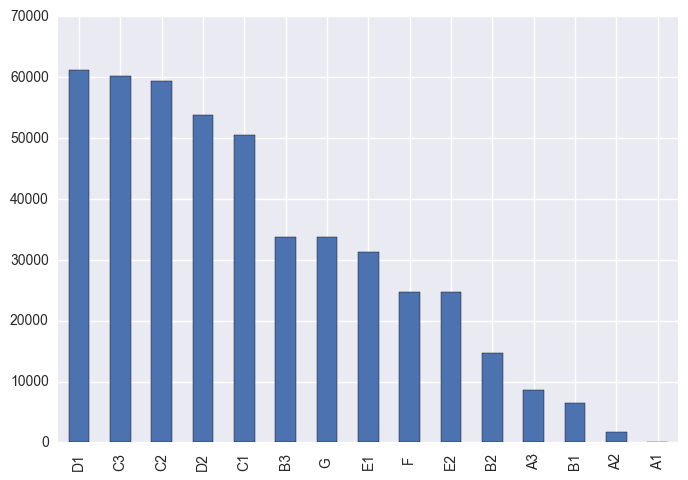

In [8]:
train['EnergyRatingCat'].value_counts().plot.bar()

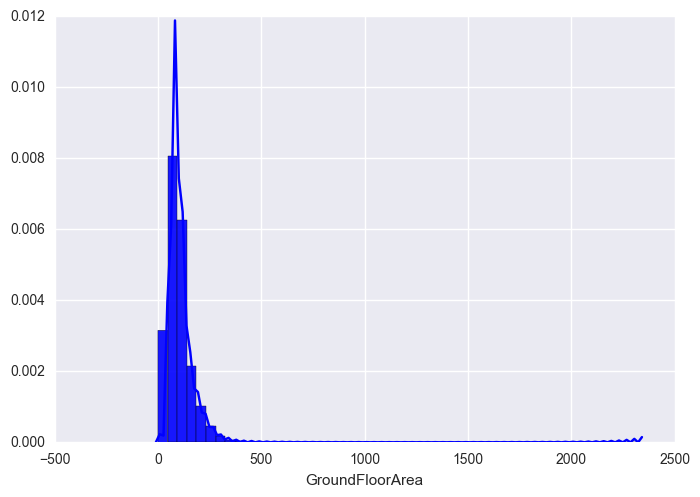

In [20]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(train['GroundFloorArea'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

Most of the variables were skewed,missing values or not formatted. 
So I decided to feature engineer the varaibles with fill, median etc. I spent a long time to feature engineer thinking about feature selection and normaize the data. It turned out to be my biggest mistake.Mostly every column needed something to be done. Also, it was really time consuming. I should have taken an approach with selecting only few variables which I thought were important and easy to manipulate. 

#### Join the two datasets

In [6]:
df = train.append(test, ignore_index = True)

###### Selecting only few columns to start modelling

I started with dropping columns which had NaN , however I was scared I will loose valuable information. However, I feel that I should have gone with the idea of dropping the columns to simplify the dataset and make a quick submission for benchmark puposes.

Some variables such as MainWHFuel or VentMethod contained space, brackets or two to 6 words, I spent my time in proving formatting them or trusting dummyvariables or label encoder(scikit-learn) to do the job for me. However,Label encoder does not work on unformatted text and large datasets mean either errors or memory errors. 

All this led to turning on or off my laptop on numerous occasions.

With only 2 hours left, I decided to use only the numerical variables but I guess I left it quiet late. 

In hindsight I believe a better approach would have been selecting few columns which needed less feature engineering or those which I considered important after reading the descriptions of the variables.

###### Selecting a smaller dataset to model

In [13]:
#http://stackoverflow.com/questions/11285613/selecting-columns
df1 = df[['RatingType','TotFloorArea','GroundFloorArea','Type','EnergyRatingCont','AvgWallU','AvgRoofU','AvgFloorU','AvgWindowU','AvgDoorU','ExposedWallArea','ExposedRoofArea','NStoreys','SharedMPRN','BuildingReg','NChimneys','DLobby','WallStructure','PermTest','WarmAir','StorageLoss','EnergyRatingCat']]

In [14]:
df1.columns

Index(['RatingType', 'TotFloorArea', 'GroundFloorArea', 'Type',
       'EnergyRatingCont', 'AvgWallU', 'AvgRoofU', 'AvgFloorU', 'AvgWindowU',
       'AvgDoorU', 'ExposedWallArea', 'ExposedRoofArea', 'NStoreys',
       'SharedMPRN', 'BuildingReg', 'NChimneys', 'DLobby', 'WallStructure',
       'PermTest', 'WarmAir', 'StorageLoss', 'EnergyRatingCat'],
      dtype='object')

###### Changing GroundFloorArea to numercial variable

In [15]:
df1['GroundFloorArea'] = df1['GroundFloorArea'].str.strip('sq. m')
df1['GroundFloorArea'] = df1['GroundFloorArea'].astype(float)

In [19]:
#Check columns with null values
df1.isnull().any()

RatingType          True
TotFloorArea        True
GroundFloorArea     True
Type                True
EnergyRatingCont    True
AvgWallU            True
AvgRoofU            True
AvgFloorU           True
AvgWindowU          True
AvgDoorU            True
ExposedWallArea     True
ExposedRoofArea     True
NStoreys            True
SharedMPRN          True
BuildingReg         True
NChimneys           True
DLobby              True
WallStructure       True
PermTest            True
WarmAir             True
StorageLoss         True
EnergyRatingCat     True
dtype: bool

###### Feature Enginerring

In [22]:
#Imputing all numerical values with median or zero
df1.loc[:, "TotFloorArea"] = df1.loc[:, "TotFloorArea"].fillna(df1['TotFloorArea'].median())
df1.loc[:, "GroundFloorArea"] = df1.loc[:, "GroundFloorArea"].fillna(df1['GroundFloorArea'].median())
df1.loc[:, "EnergyRatingCont"] = df1.loc[:, "EnergyRatingCont"].fillna(df1['EnergyRatingCont'].median())
df1.loc[:, "AvgWallU"] = df1.loc[:, "AvgWallU"].fillna(df1['AvgWallU'].median())
df1.loc[:, "AvgRoofU"] = df1.loc[:, "AvgRoofU"].fillna(df1['AvgRoofU'].median())
df1.loc[:, "AvgFloorU"] = df1.loc[:, "AvgFloorU"].fillna(df1['AvgFloorU'].median())
df1.loc[:, "AvgWindowU"] = df1.loc[:, "AvgWindowU"].fillna(df1['AvgWindowU'].median())
df1.loc[:, "AvgDoorU"] = df1.loc[:, "AvgDoorU"].fillna(df1['AvgDoorU'].median())
df1.loc[:, "ExposedWallArea"] = df1.loc[:, "ExposedWallArea"].fillna(df1['ExposedWallArea'].median())
df1.loc[:, "ExposedRoofArea"] = df1.loc[:, "ExposedRoofArea"].fillna(df1['ExposedRoofArea'].median())
df1.loc[:, "NStoreys"] = df1.loc[:, "NStoreys"].fillna(0)
df1.loc[:, "BuildingReg"] = df1.loc[:, "BuildingReg"].fillna(df1['BuildingReg'].median())
df1.loc[:, "NChimneys"] = df1.loc[:, "NChimneys"].fillna(0)


In [23]:
df1.dtypes

RatingType           object
TotFloorArea        float64
GroundFloorArea     float64
Type                 object
EnergyRatingCont    float64
AvgWallU            float64
AvgRoofU            float64
AvgFloorU           float64
AvgWindowU          float64
AvgDoorU            float64
ExposedWallArea     float64
ExposedRoofArea     float64
NStoreys            float64
SharedMPRN           object
BuildingReg         float64
NChimneys           float64
DLobby               object
WallStructure        object
PermTest             object
WarmAir              object
StorageLoss          object
EnergyRatingCat      object
dtype: object

In [24]:
#Filling all Nan Categorical except EnergyRatingCat (which is our target variable) values
df1.loc[:, "RatingType"] = df1.loc[:, "RatingType"].fillna("None")
df1.loc[:, "Type"] = df1.loc[:, "Type"].fillna("None")
df1.loc[:, "SharedMPRN"] = df1.loc[:, "SharedMPRN"].fillna("No")
df1.loc[:, "DLobby"] = df1.loc[:, "DLobby"].fillna("No")
df1.loc[:, "WallStructure"] = df1.loc[:, "WallStructure"].fillna("None")
df1.loc[:, "PermTest"] = df1.loc[:, "PermTest"].fillna("No")
df1.loc[:, "WarmAir"] = df1.loc[:, "WarmAir"].fillna("No")
df1.loc[:, "StorageLoss"] = df1.loc[:, "StorageLoss"].fillna("No")

In [27]:
df_M = df1.ix[:, df1.columns != 'EnergyRatingCat']

In [52]:
target = train[pd.notnull(train['EnergyRatingCat'])]
target = train['EnergyRatingCat']
target.isnull().any()

False

###### Label encode all categorical variables

In [56]:
#http://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df_M['RatingType'] = class_le.fit_transform(df_M['RatingType'].values)
df_M['Type'] = class_le.fit_transform(df_M['Type'].values)
df_M['SharedMPRN'] = class_le.fit_transform(df_M['SharedMPRN'].values)
df_M['DLobby'] = class_le.fit_transform(df_M['DLobby'].values)
df_M['WallStructure'] = class_le.fit_transform(df_M['WallStructure'].values)
df_M['PermTest'] = class_le.fit_transform(df_M['PermTest'].values)
df_M['WarmAir'] = class_le.fit_transform(df_M['WarmAir'].values)


StorageLoss had space as well as some had small letters and some Uppercase. LabelEncode doesnot work with this. 

In [57]:
df_M['StorageLoss'] = df_M['StorageLoss'].str.strip(' ')

In [58]:
df_M['StorageLoss'] = df_M['StorageLoss'].str.upper()

In [59]:
df_M['StorageLoss'] = class_le.fit_transform(df_M['StorageLoss'].values)

In [72]:
#Encoding target variable
y = class_le.fit_transform(target.values)
y

array([13, 14, 10, ...,  7,  5,  9], dtype=int64)

###### Separate the target variable and separate the training and test data set

In [60]:
X = df_M[:train.shape[0]]
test = df_M[train.shape[0]:]

In [61]:
print (str(len(train))+" rows for training set")
print (str(len(test))+" rows for test set")
print (str(len(target))+" rows for target")

464502 rows for training set
159262 rows for test set
464502 rows for target


###### Modelling

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [73]:
test_y = clf.predict(test)
test_y

array([8, 8, 8, ..., 8, 8, 8], dtype=int64)

###### Transform back to labels

In [74]:
test_y_1 = class_le.inverse_transform(test_y)

In [75]:
test_y_1

array(['C3', 'C3', 'C3', ..., 'C3', 'C3', 'C3'], dtype=object)

###### Submission

In [76]:
submission = pd.DataFrame()
submission["BuildingID"] = test.index
submission["EnergyRatingCat"]= test_y_1

submission.to_csv("final_result.txt",index=False,sep ="\t")

For next iteration I would have added more columns and extended my model.

I would have been able to try different algorithms, cross validation etc. on a smaller dataset.

###### I feel this bottom-up approach is better than top-down approach trying to figure out all the data,feature engineering and feature selection when there is limited time and a challenging data.

What do you think?

Please feel free to leave a comment or suggestions.